# Anusha Yarrasani
# Sam Id: 000932535

### <font color = #27C3E5> 1.1: </font> <font color = #41EA46> Import Libraries and Dataset </font>

#### <font color = blue> Import the Libraries

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize, fmin_tnc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter

#### <font color = blue>Import the Dataset

In [146]:
df = pd.read_csv("diabetes.csv")
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


### <font color = #27C3E5> 1.2: </font> <font color = #41EA46> Data Summary and Visualization </font>

#### <font color = blue>Data shape

In [147]:
print("Number of columns:", df.shape[1])
print("Number of rows: ", df.shape[0])

Number of columns: 9
Number of rows:  768


#### <font color = blue>Data Info

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### <font color = blue>Data Description

In [149]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### <font color = blue> Visualize the Label Class

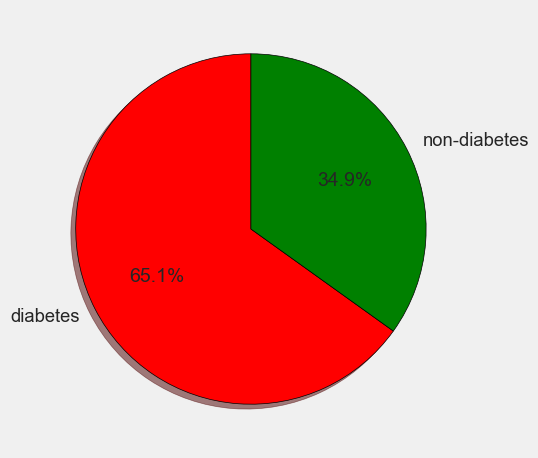

In [150]:
plt.style.use('fivethirtyeight')
diabetes = df[df['Outcome'] == 0].shape[0]
non_diabetes = df[df['Outcome'] == 1].shape[0]

label = [diabetes, non_diabetes]
plt.pie(label, labels = ['diabetes', 'non-diabetes'], shadow = True, wedgeprops = {'edgecolor': 'black'},
        autopct = '%4.1f%%', startangle = 90, colors = ['red', 'green'])
plt.tight_layout()
plt.show()

#### <font color = blue> Realtionship of Features

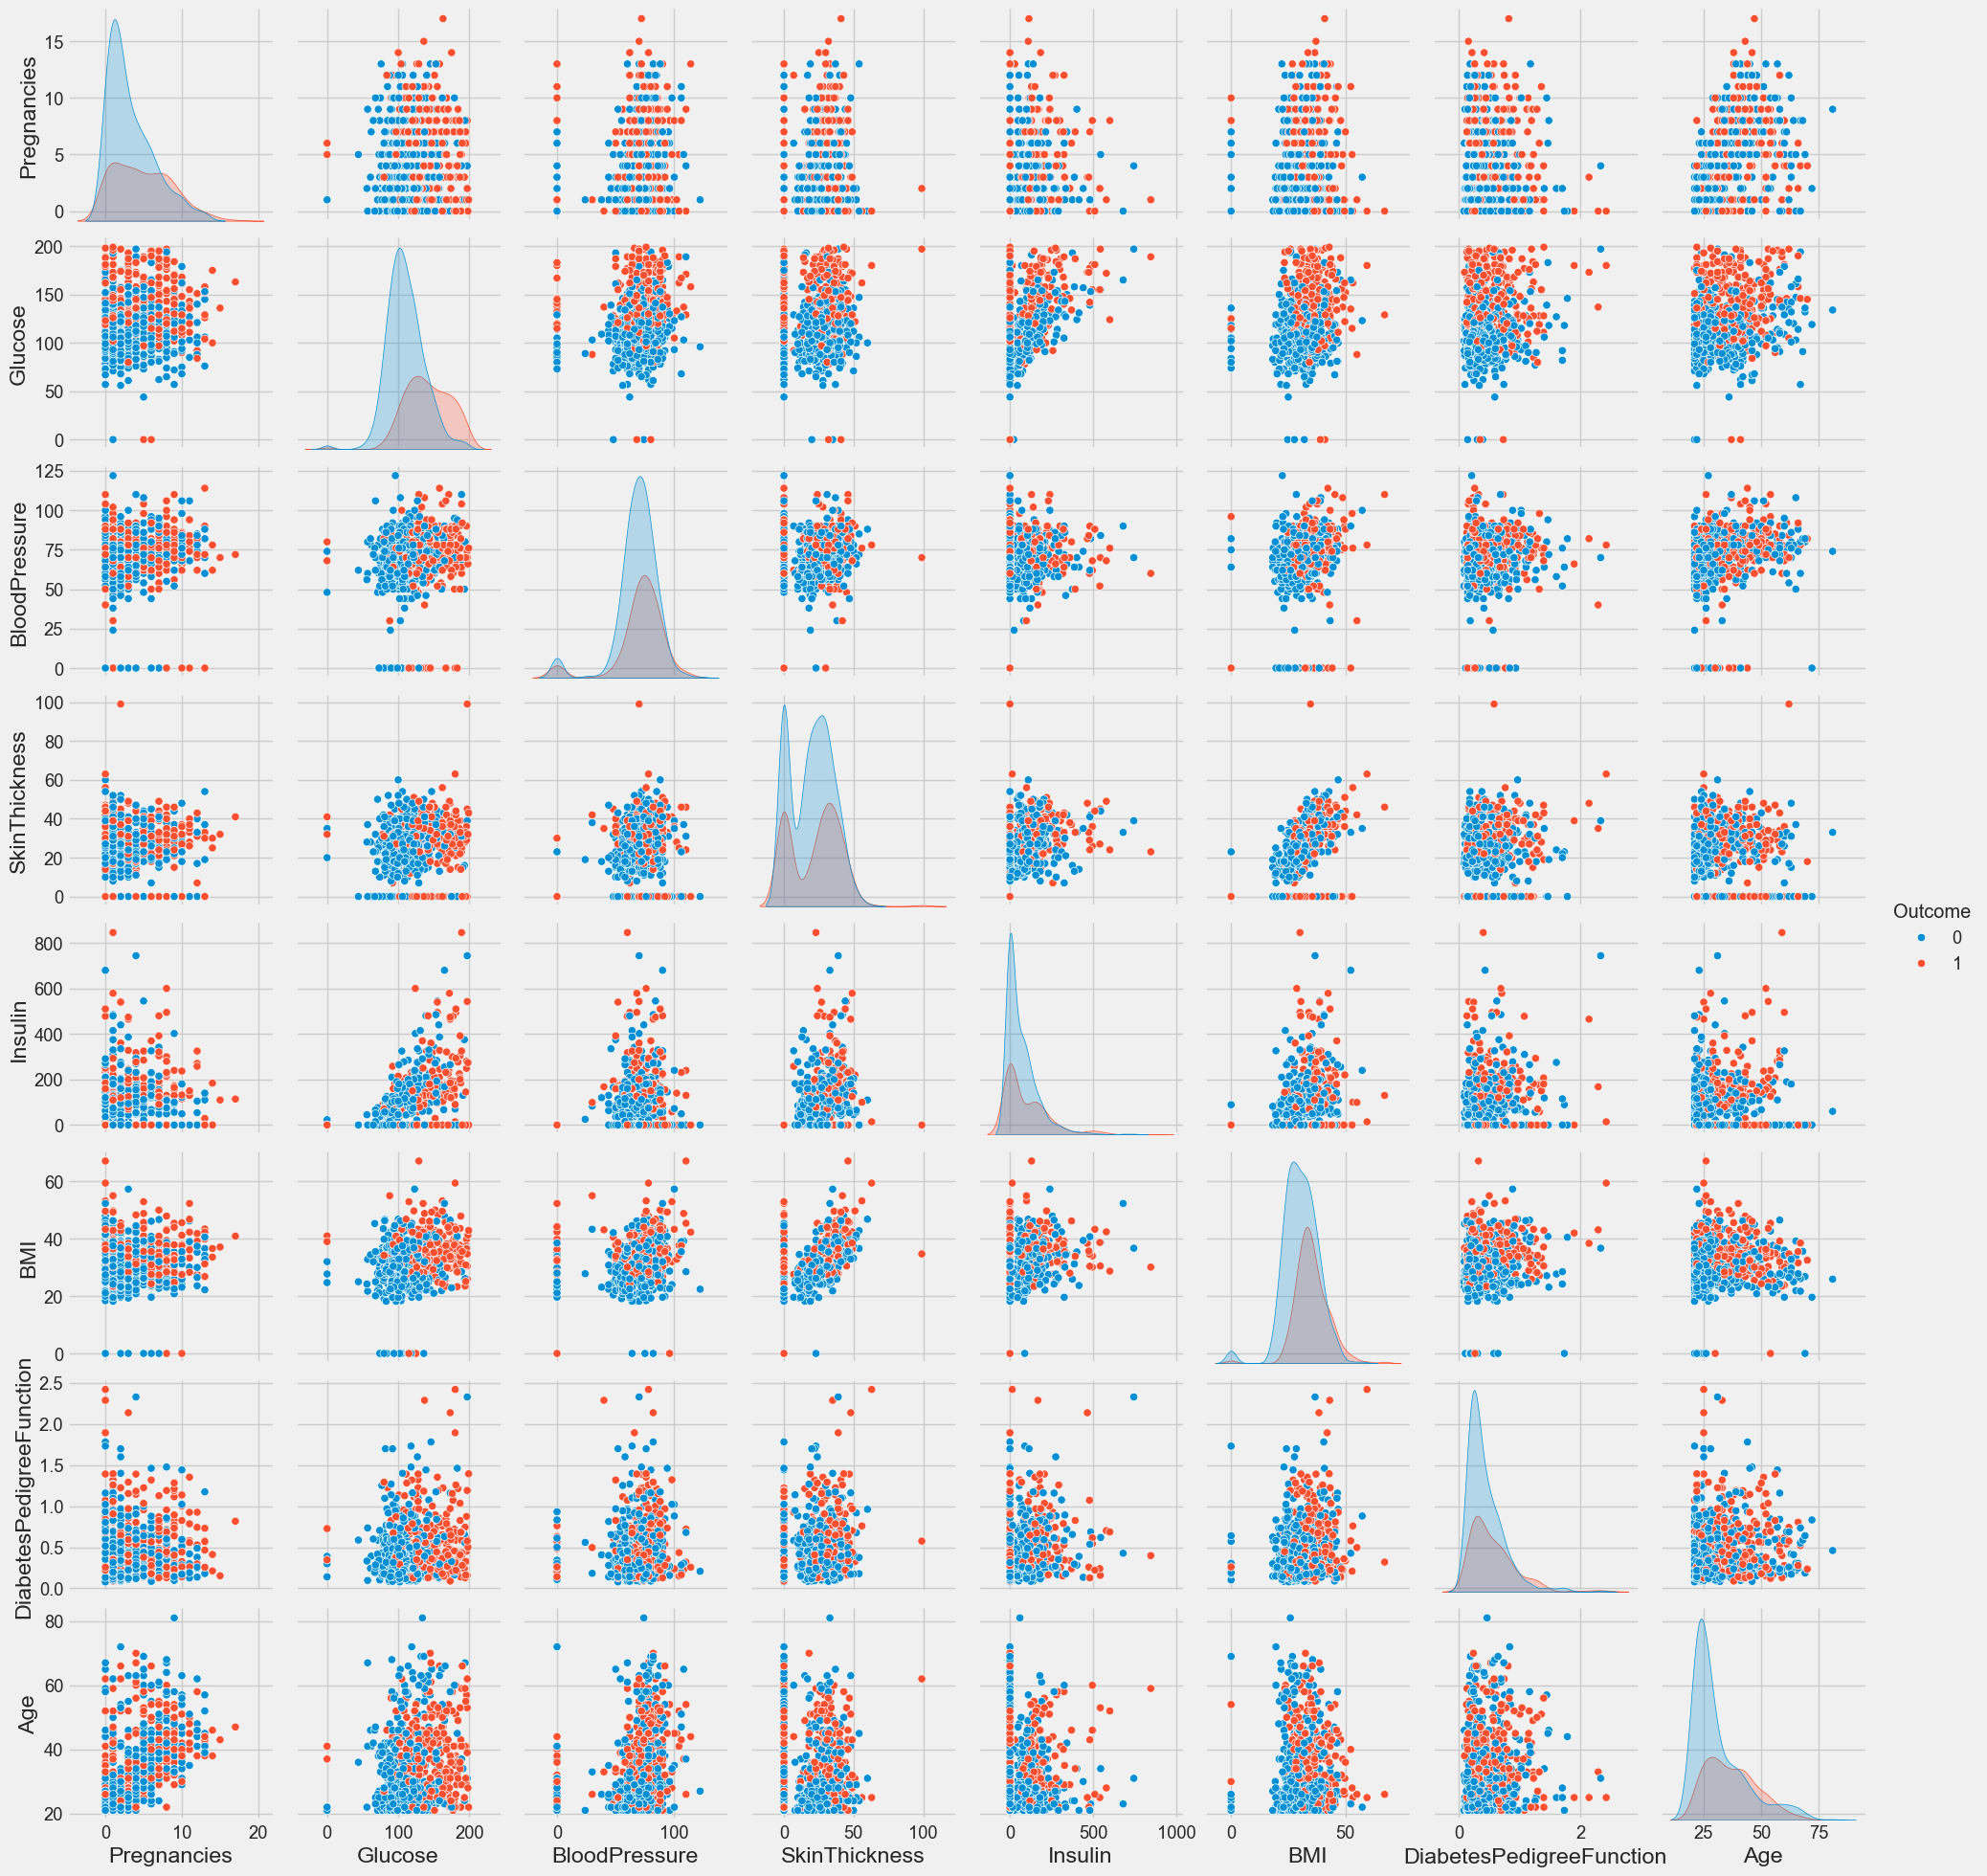

In [151]:
sns.pairplot(df, hue = 'Outcome')  # blue = diabetes, red = non-diabetes class

#### <font color = blue> Check the Correaltion of Features

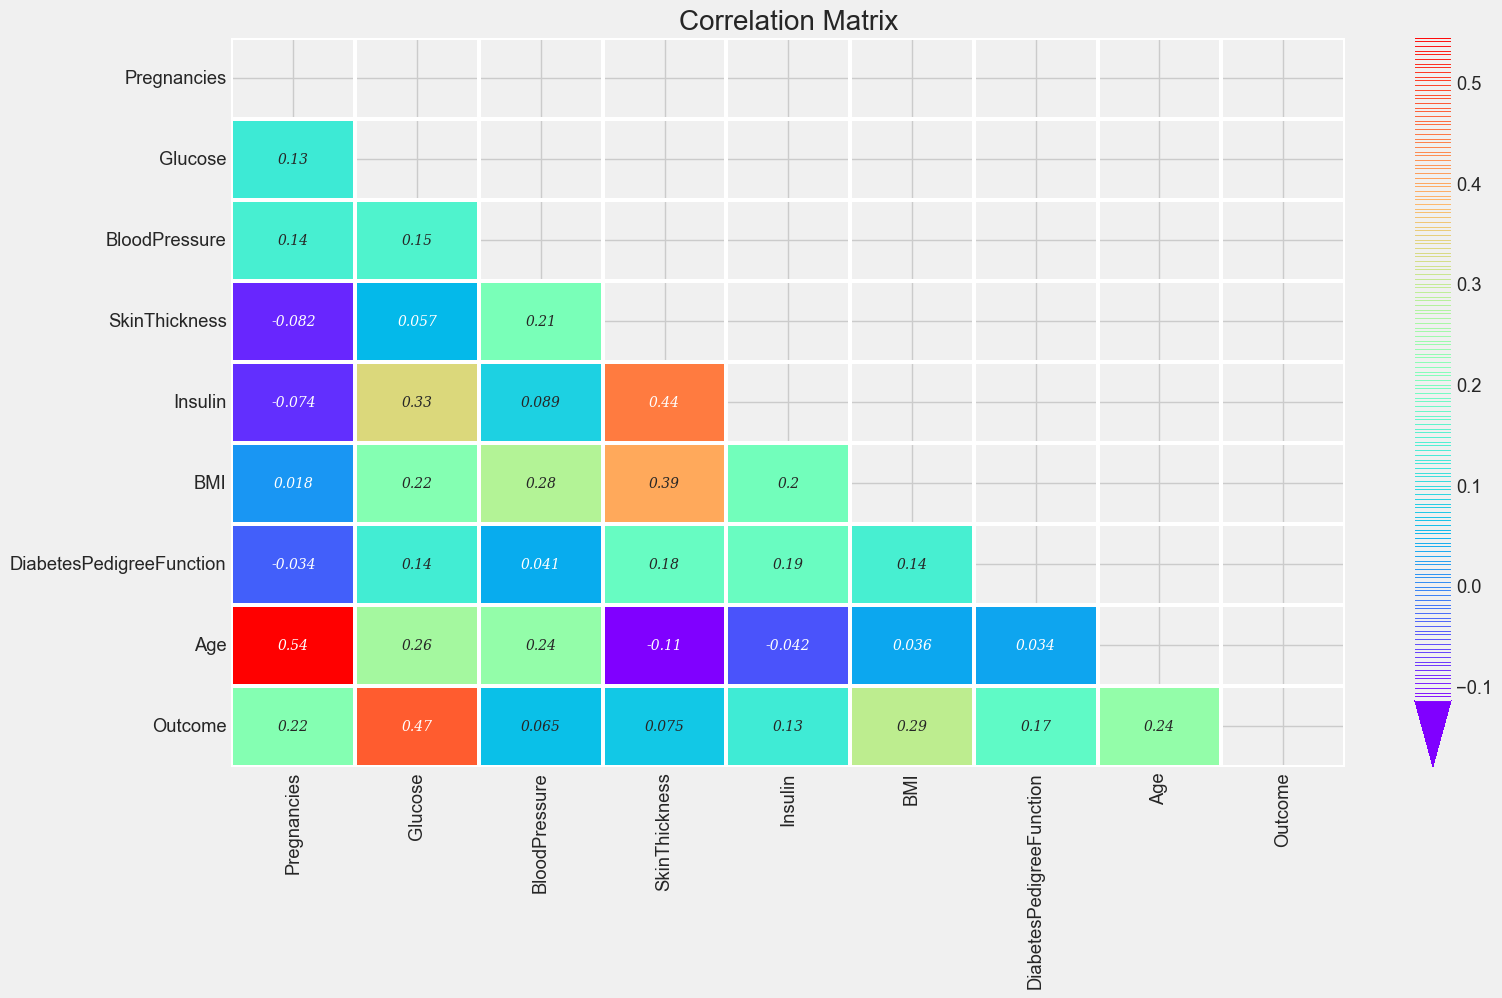

In [152]:
# Define the figure size
plt.figure(figsize = (16, 9))

# Cutomize the annot
annot_kws={'fontsize':10,                      # To change the size of the font
           'fontstyle':'italic',               # To change the style of font 
           'fontfamily': 'serif',              # To change the family of font 
           'alpha':1 }                         # To change the transparency of the text  


# Customize the cbar
cbar_kws = {"shrink":1,                        # To change the size of the color bar
            'extend':'min',                    # To change the end of the color bar like pointed
            'extendfrac':0.1,                  # To adjust the extension of the color bar
            "drawedges":True,                  # To draw lines (edges) on the color bar
           }

# take upper correlation matrix
matrix = np.triu(df.corr())

# Generate heatmap correlation
ax = sns.heatmap(df.corr(), mask = matrix, cmap = 'rainbow', annot = True, linewidth = 1.5 ,annot_kws= annot_kws, cbar_kws=cbar_kws)

# Set the title etc
plt.title('Correlation Matrix', fontsize = 20)

# Set the size of text
sns.set(font_scale = 1.2)

## <font color = #950CDF> Part 2: </font> <font color = #4854E8> Data Preprocessing </font>

### <font color = #27C3E5> 2.1: </font> <font color = #41EA46> Define Predictor and target Attribute </font>

In [155]:
X = df.iloc[:, [0,1]] #Considering only two features 
y = df.iloc[:, -1]

#### <font color = blue> Predictor Attribute

In [156]:
X.head()

,Pregnancies,Glucose
0,6,148
1,1,85
2,8,183
3,1,89
4,0,137


#### <font color = blue> Target Attribute

In [157]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

### <font color = #27C3E5> 2.2: </font> <font color = #41EA46> Dealing with Missing Value </font>

#### <font color = blue> Check the Missing Value

In [158]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### <font color = #27C3E5> 2.3: </font> <font color = #41EA46> Feature Scaling </font>

#### <font color = blue> Apply Standard Scaler

In [159]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X = sc_X.fit_transform(X)

#### <font color = blue> After apply Standard Scaler

In [160]:
pd.DataFrame(X).head()

,0,1
0,0.639947,0.848324
1,-0.844885,-1.123396
2,1.233880,1.943724
3,-0.844885,-0.998208
4,-1.141852,0.504055


### <font color = #27C3E5> 2.4: </font> <font color = #41EA46> Split the Data into Train and Test </font>

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

#### <font color = blue> Training Data

In [162]:
print("X_test", X_train.shape)
print("X_test", y_train.shape)

X_test (614, 2)
X_test (614,)


#### <font color = blue> Testing Data

In [163]:
print("X_test", X_test.shape)
print("X_test", y_test.shape)

X_test (154, 2)
X_test (154,)


## <font color = #950CDF> Part 4: </font> <font color = #4854E8> Build Support Vector Machine  </font>
In this part, we build Support Vector Machine Classification Model using Scikit-Learn

#### <font color = blue> Import Model from Sklearn

In [164]:
from sklearn.svm import SVC

#### <font color = blue> Initialize the Model

In [165]:
clf = SVC(
          C=1.0,                          # The regularization parameter
          kernel='linear',                # The kernel type used 
       #  degree=3,                       # Degree of polynomial function 
          gamma='scale',                  # The kernel coefficient
          coef0=0.0,                      # If kernel = 'poly'/'sigmoid'
          shrinking=True,                 # To use shrinking heuristic
          probability=False,              # Enable probability estimates
          tol=0.001,                      # Stopping crierion
          cache_size=200,                 # Size of kernel cache
          class_weight=None,              # The weight of each class
          verbose=False,                  # Enable verbose output
          max_iter=- 1,                   # Hard limit on iterations
          decision_function_shape='ovr',  # One-vs-rest or one-vs-one
          break_ties=False,               # How to handle breaking ties
          random_state=None               # Random state of the model
)

In [166]:
Cs = [0.1, 1, 10, 100]
gammas = [0.1, 1, 10, 100]

In [167]:
classifiers = []
for C in Cs:
    for gamma in gammas:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X_train, y_train)
        classifiers.append((C, gamma, clf))

In [168]:
from sklearn.model_selection import GridSearchCV

# Grid search
clf = GridSearchCV(SVC(), param_grid={'C':C_range, 'gamma':gamma_range}) 
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': array([ 1.25892541,  1.58489319,  1.99526231,  2.51188643,  3.16227766,
        3.98107171,  5.01187234,  6.30957344,  7.94328235, 10.        ]),
                         'gamma': array([1.02329299])})

In [169]:
# Print results
print(clf.best_params_)
print(clf.best_score_) 

{'C': 1.2589254117941673, 'gamma': 1.023292992280754}
0.7361721977875516


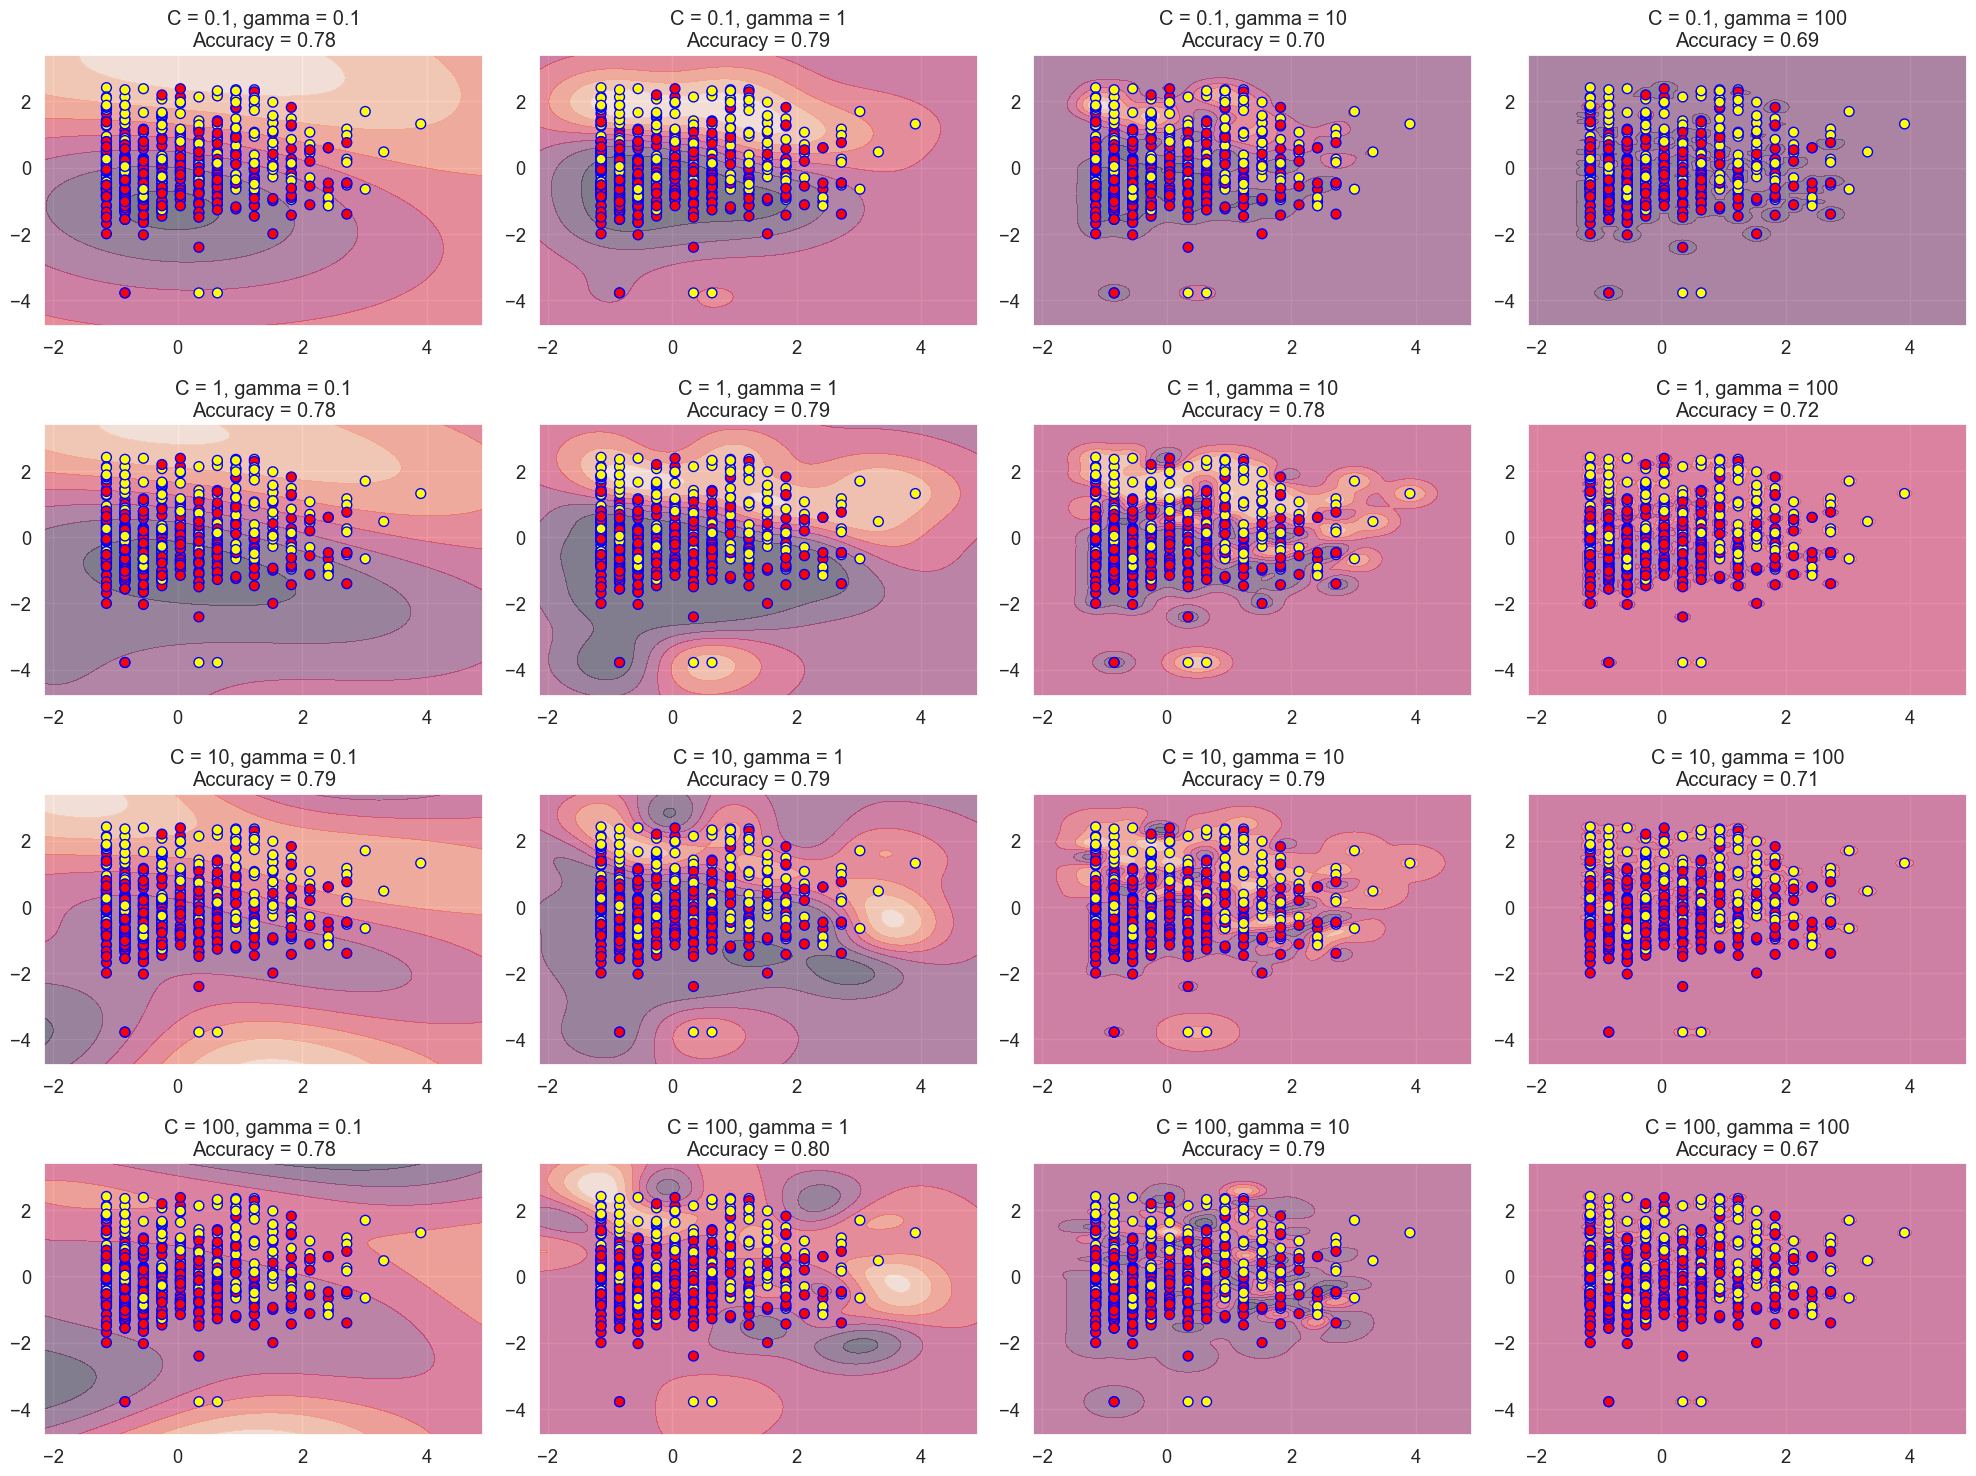

Model 1: C = 0.1, gamma = 0.1, Accuracy = 0.78
Model 2: C = 0.1, gamma = 1, Accuracy = 0.79
Model 3: C = 0.1, gamma = 10, Accuracy = 0.70
Model 4: C = 0.1, gamma = 100, Accuracy = 0.69
Model 5: C = 1, gamma = 0.1, Accuracy = 0.78
Model 6: C = 1, gamma = 1, Accuracy = 0.79
Model 7: C = 1, gamma = 10, Accuracy = 0.78
Model 8: C = 1, gamma = 100, Accuracy = 0.72
Model 9: C = 10, gamma = 0.1, Accuracy = 0.79
Model 10: C = 10, gamma = 1, Accuracy = 0.79
Model 11: C = 10, gamma = 10, Accuracy = 0.79
Model 12: C = 10, gamma = 100, Accuracy = 0.71
Model 13: C = 100, gamma = 0.1, Accuracy = 0.78
Model 14: C = 100, gamma = 1, Accuracy = 0.80
Model 15: C = 100, gamma = 10, Accuracy = 0.79
Model 16: C = 100, gamma = 100, Accuracy = 0.67


In [171]:
# Plot Creating
plt.figure(figsize=(20, 15))

xx, yy = np.meshgrid(np.linspace(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, 200),
                     np.linspace(X_train[:, 1].min() - 1, X_train[:, 1].max() + 1, 200))

# Creating an empty for accuracies
accuracies = []

# Generating decision boundary plot 
for i, (C, gamma, clf) in enumerate(classifiers):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(len(Cs), len(gammas), i + 1)
    plt.contourf(xx, yy, Z, alpha=0.5)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50,
                cmap='autumn', edgecolors='blue')

    # Calculating the accuracy
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    accuracies.append(accuracy)

    # Accuracy along with c and gamma 
    plt.title(f'C = {C}, gamma = {gamma}\nAccuracy = {accuracy:.2f}')

plt.tight_layout()
plt.show()

# Displaying accuracies 
for i, (C, gamma, clf) in enumerate(classifiers):
    print(f'Model {i+1}: C = {C}, gamma = {gamma}, Accuracy = {accuracies[i]:.2f}')


#### <font color = blue> Fit the Model

#### <font color = blue> Predict the Test Data</font>

In [172]:
y_pred = clf.predict(X_test)

## <font color = #950CDF> Part 4: </font> <font color = #4854E8> Evaluate the Result </font>
In this part, we evaluate the Support Vector Machine. first we make confusion matrix and we visualize the score following ("Accuracy", "Precision", "TPR", "FPR", "F-Score", "Specificity", "Error" and "Roc Area").

### <font color = #27C3E5> 4.1: </font> <font color = #41EA46> Confusion Matrix</font>

<Axes: >

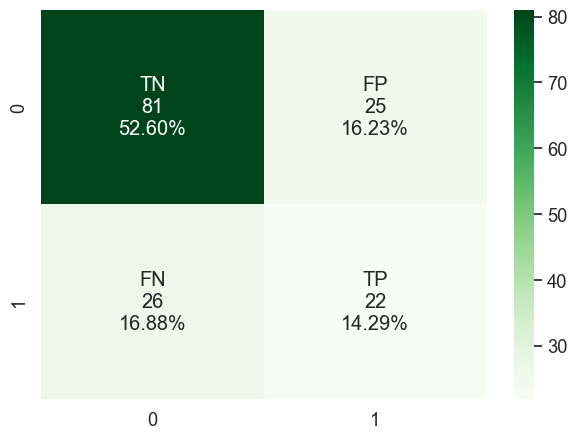

In [173]:
from sklearn.metrics import confusion_matrix
confusion_matrix_ = confusion_matrix(y_pred, y_test)

#[row, column]
TP = confusion_matrix_[1, 1]        
TN = confusion_matrix_[0, 0]           
FP = confusion_matrix_[0, 1]           
FN = confusion_matrix_[1, 0]

group_names = ['TN','FP','FN','TP']

group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix_.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in confusion_matrix_.flatten()/np.sum(confusion_matrix_)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(confusion_matrix_, annot=labels, fmt='', cmap='Greens')

### <font color = #27C3E5> 4.2: </font> <font color = #41EA46>  Evaluate the Results </font>

In [174]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, roc_auc_score

#### <font color = blue>4.2.1: Calculate the Results

In [175]:
# Accuracy Score
Accuracy = accuracy_score(y_pred, y_test)
print('Accuracy Score:', Accuracy) 

# Precision Score
Precision = precision_score(y_pred, y_test)
print('Precision Score:', Precision)   

# True positive Rate (TPR) or Sensitivity or Recall
TPR = recall_score(y_pred, y_test)
print('True positive Rate:', TPR)             

# False positive Rate (FPR)
FPR = FP / float(TN + FP)
print('False positive Rate', FPR)                       

# F1 Score or F-Measure or F-Score
F1 = f1_score(y_pred, y_test)
print('F1 Score:', F1)                 

# Specificity
Specificity = TN / (TN + FP)
print('Specificity:', Specificity)                    

# Mean Absolute Error
Error = mean_absolute_error(y_pred, y_test)
print('Mean Absolute Error:', Error)   

# ROC Area
Roc = roc_auc_score(y_pred, y_test)
print('ROC Area:', Roc) 

Accuracy Score: 0.6688311688311688
Precision Score: 0.46808510638297873
True positive Rate: 0.4583333333333333
False positive Rate 0.2358490566037736
F1 Score: 0.46315789473684216
Specificity: 0.7641509433962265
Mean Absolute Error: 0.33116883116883117
ROC Area: 0.6112421383647798


#### <font color = blue>4.2.2: Visualize the Results

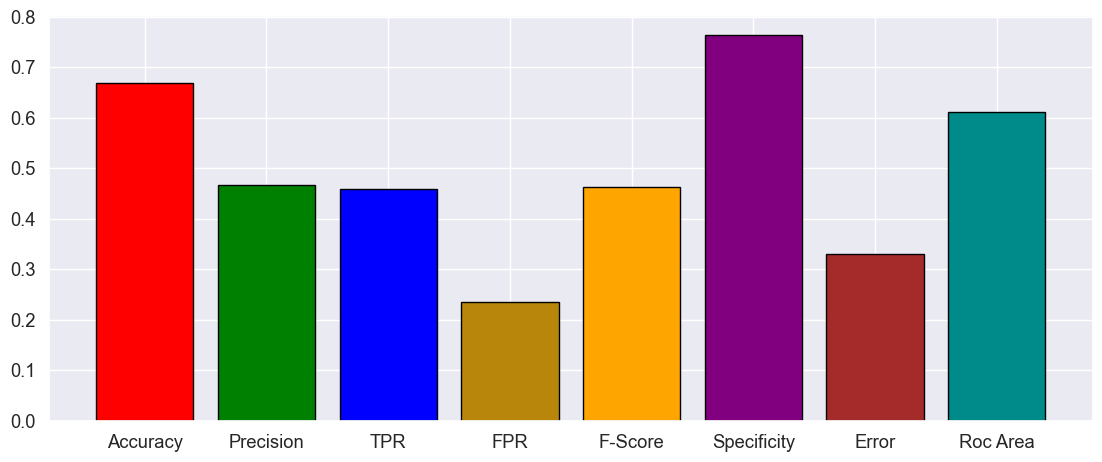

In [176]:
plt.figure(figsize = (12, 5))

result = [Accuracy, Precision, TPR, FPR, F1, Specificity, Error, Roc]
label = ["Accuracy", "Precision", "TPR", "FPR", "F-Score", "Specificity", "Error", "Roc Area"]
colors=[ 'red', 'green', 'blue', 'darkgoldenrod', 'orange', 'purple', 'brown', 'darkcyan']

plt.bar(label, result, color = colors, edgecolor='black')
plt.show()